In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [9]:
!pip install yfinance

In [2]:
import yfinance as yf

In [5]:
df=yf.download("AAPL",start="2020-01-01",end="2024-01-01")

C:\Users\mnave\AppData\Local\Temp\ipykernel_2512\1300304933.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("AAPL",start="2020-01-01",end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620850  72.681296  71.373226  71.627100  135480400
2020-01-03  71.914833  72.676462  71.689973  71.847133  146322800
2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200
2020-01-07  72.146935  72.753816  71.926907  72.497522  108872000
2020-01-08  73.307503  73.609737  71.849525  71.849525  132079200

In [8]:
df["MA50"]=df["Close"].rolling(window=50).mean()

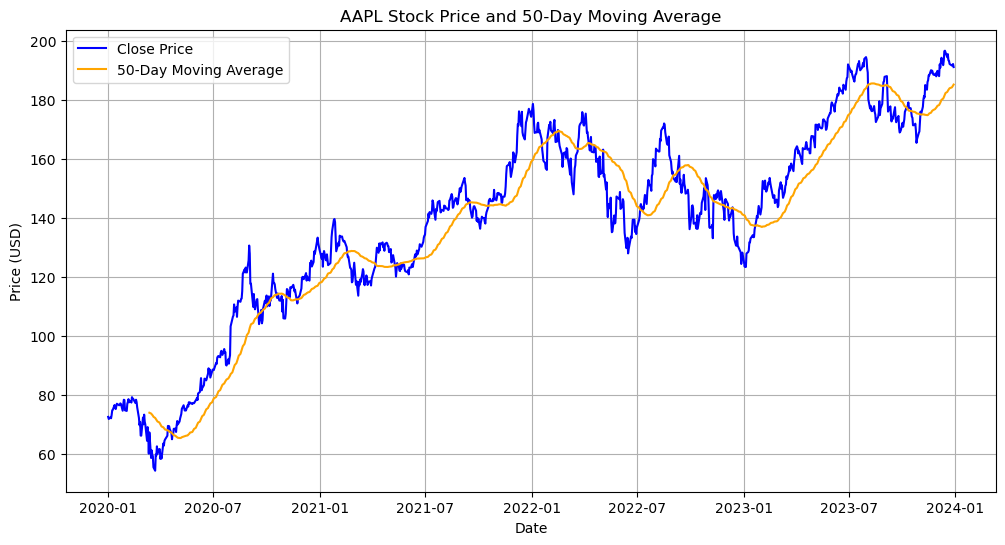

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price", color='blue')
plt.plot(df["MA50"], label="50-Day Moving Average", color='orange')
plt.title("AAPL Stock Price and 50-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
df["Daily Return"] = df["Close"].pct_change()

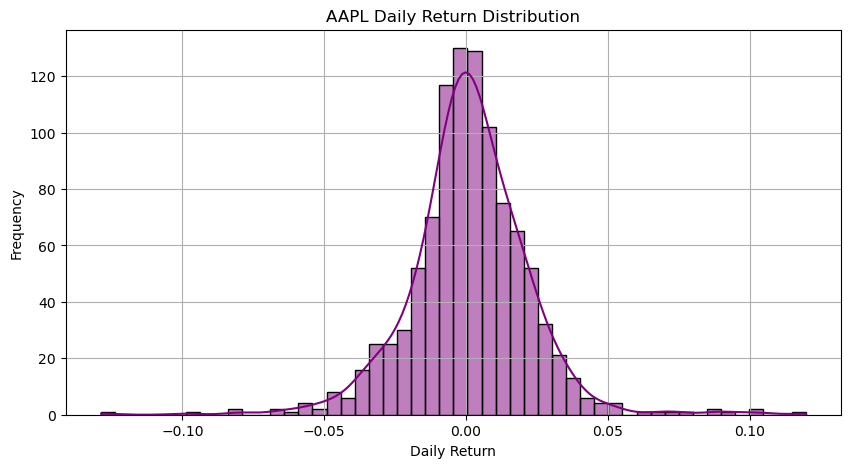

Annualized Volatility: 0.3357


In [14]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df["Daily Return"].dropna(), bins=50, kde=True, color='purple')
plt.title("AAPL Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
volatility = df["Daily Return"].std() * (252 ** 0.5)
print(f"Annualized Volatility: {volatility:.4f}")


In [18]:
initial_price = df["Close"].iloc[0].item()
final_price = df["Close"].iloc[-1].item()
roi = (final_price - initial_price) / initial_price
print(f"Initial Price: {initial_price:.2f}")
print(f"Final Price: {final_price:.2f}")
print(f"ROI over period: {roi:.4f} or {roi * 100:.2f}%")

Initial Price: 72.62
Final Price: 191.13
ROI over period: 1.6319 or 163.19%


In [19]:
years = (df.index[-1] - df.index[0]).days / 365
cagr = (final_price / initial_price) ** (1 / years) - 1
print(f"Investment Duration: {years:.2f} years")
print(f"CAGR: {cagr:.4f} or {cagr * 100:.2f}%")


Investment Duration: 3.99 years
CAGR: 0.2743 or 27.43%


In [20]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]
data = yf.download(tickers, start="2020-01-01", end="2024-01-01")["Close"]
data.head()

C:\Users\mnave\AppData\Local\Temp\ipykernel_2512\2843838513.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2024-01-01")["Close"]
[*********************100%***********************]  4 of 4 completed


Ticker           AAPL       AMZN      GOOGL        MSFT
Date                                                   
2020-01-02  72.620850  94.900497  68.026024  153.042313
2020-01-03  71.914833  93.748497  67.670158  151.136658
2020-01-06  72.487839  95.143997  69.473846  151.527298
2020-01-07  72.146935  95.343002  69.339645  150.145737
2020-01-08  73.307503  94.598503  69.833191  152.537323

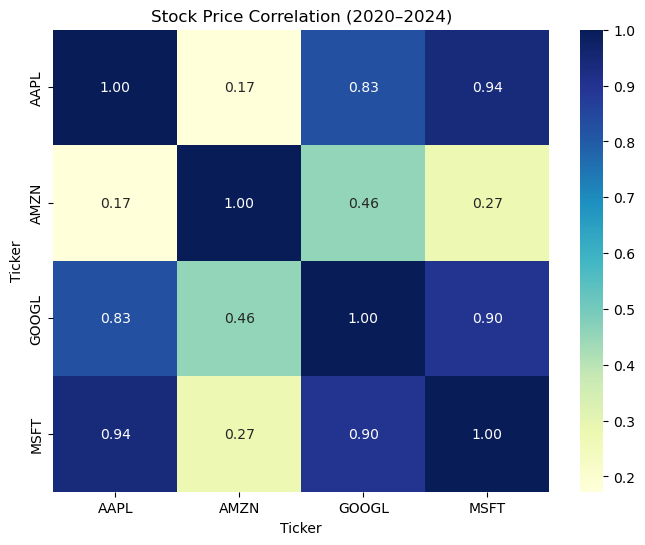

In [21]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Stock Price Correlation (2020–2024)")
plt.show()

C:\Users\mnave\AppData\Local\Temp\ipykernel_2512\1961795292.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df["Close"].resample('M').mean()


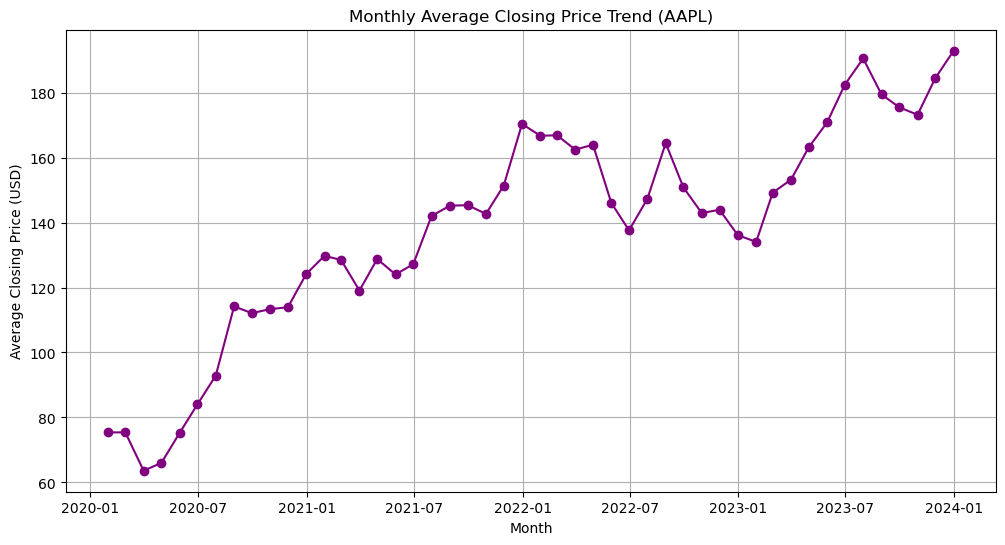

In [22]:
monthly_trend = df["Close"].resample('M').mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend, color='purple', marker='o')
plt.title("Monthly Average Closing Price Trend (AAPL)")
plt.xlabel("Month")
plt.ylabel("Average Closing Price (USD)")
plt.grid(True)
plt.show()